In [3]:
## Import Libraries
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from io import StringIO

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]
pd.plotting.register_matplotlib_converters()
plt.style.use('seaborn-dark')

In [5]:
download_link = 'https://www.arcgis.com/sharing/rest/content/items/f10774f1c63e40168479a1feb6c7ca74/data'
# see https://www.arcgis.com/home/item.html?id=dd4580c810204019a7b8eb3e0b329dd6
# new source https://www.arcgis.com/home/item.html?id=f10774f1c63e40168479a1feb6c7ca74

In [6]:
req = requests.get(download_link)
rki_raw = pd.read_csv(StringIO(req.text))

In [9]:
rki_raw.tail()

FID  IdBundesland Bundesland            Landkreis Altersgruppe  \
1346327  1346328            16  Thüringen  LK Altenburger Land      A60-A79   
1346328  1346329            16  Thüringen  LK Altenburger Land      A60-A79   
1346329  1346330            16  Thüringen  LK Altenburger Land      A60-A79   
1346330  1346331            16  Thüringen  LK Altenburger Land      A60-A79   
1346331  1346332            16  Thüringen  LK Altenburger Land      A60-A79   

        Geschlecht  AnzahlFall  AnzahlTodesfall           Meldedatum  \
1346327          M           1                0  2020/11/18 00:00:00   
1346328          M           1                0  2020/11/19 00:00:00   
1346329          M           1                0  2020/11/20 00:00:00   
1346330          M           5                0  2020/11/20 00:00:00   
1346331          M           1                1  2020/11/21 00:00:00   

         IdLandkreis             Datenstand  NeuerFall  NeuerTodesfall  \
1346327        16077  05.03.2021, 00:00 Uhr          0              -9   
1346328        16077  05.03.2021, 00:00 Uhr          0              -9   
1346329        16077  05.03.2021, 00:00 Uhr          0              -9   
1346330        16077  05.03.2021, 00:00 Uhr          0              -9   
1346331        16077  05.03.2021, 00:00 Uhr          0               0   

                    Refdatum  NeuGenesen  AnzahlGenesen  IstErkrankungsbeginn  \
1346327  2020/11/18 00:00:00           0              1                     0   
1346328  2020/11/16 00:00:00           0              1                     1   
1346329  2020/11/16 00:00:00           0              1                     1   
1346330  2020/11/20 00:00:00           0              5                     0   
1346331  2020/11/18 00:00:00          -9              0                     1   

             Altersgruppe2  
1346327  Nicht übermittelt  
1346328  Nicht übermittelt  
1346329  Nicht übermittelt  
1346330  Nicht übermittelt  
1346331  Nicht übermittelt

In [10]:
set(rki_raw['Altersgruppe'])

{'A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+', 'unbekannt'}

In [11]:
rki_raw_60 = rki_raw[~rki_raw.Altersgruppe.isin(['A60-A79', 'A80+'])].copy()

In [ ]:
rki_raw_under60 = rki_raw[~rki_raw.Altersgruppe.isin(['A60-A79', 'A80+'])].copy()

In [12]:
rki_raw_80 = rki_raw[rki_raw.Altersgruppe.isin(['A80+'])].copy()

In [13]:
rki_raw_80_death = rki_raw_80[rki_raw_80.NeuerTodesfall.isin([0, 1])].copy()

In [14]:
rki_raw_80_death.sort_values(by='Meldedatum').tail()

FID  IdBundesland           Bundesland         Landkreis  \
244017    244018             5  Nordrhein-Westfalen           SK Bonn   
788790    788791             8    Baden-Württemberg    LK Sigmaringen   
803743    803744             9               Bayern        SK München   
1006614  1006615             9               Bayern       SK Augsburg   
312162    312163             5  Nordrhein-Westfalen  SK Gelsenkirchen   

        Altersgruppe Geschlecht  AnzahlFall  AnzahlTodesfall  \
244017          A80+          W           1                1   
788790          A80+          M           1                1   
803743          A80+          W           1                1   
1006614         A80+          M           1                1   
312162          A80+          W           1                1   

                  Meldedatum  IdLandkreis             Datenstand  NeuerFall  \
244017   2021/03/03 00:00:00         5314  05.03.2021, 00:00 Uhr          0   
788790   2021/03/03 00:00:00         8437  05.03.2021, 00:00 Uhr          1   
803743   2021/03/04 00:00:00         9162  05.03.2021, 00:00 Uhr          1   
1006614  2021/03/04 00:00:00         9761  05.03.2021, 00:00 Uhr          1   
312162   2021/03/04 00:00:00         5513  05.03.2021, 00:00 Uhr          1   

         NeuerTodesfall             Refdatum  NeuGenesen  AnzahlGenesen  \
244017                0  2021/02/02 00:00:00          -9              0   
788790                1  2021/03/03 00:00:00          -9              0   
803743                1  2021/03/04 00:00:00          -9              0   
1006614               1  2021/02/11 00:00:00          -9              0   
312162                1  2021/03/04 00:00:00          -9              0   

         IstErkrankungsbeginn      Altersgruppe2  
244017                      1  Nicht übermittelt  
788790                      0  Nicht übermittelt  
803743                      0  Nicht übermittelt  
1006614                     1  Nicht übermittelt  
312162                      0  Nicht übermittelt

In [15]:
def new_cases_by_date(rki_raw, rki_flag_column='Neuer Fall', rki_count_columns='AnzahlFall'):
    """
    rki_raw: raw DataFrame from Robert Koch Institute
    """
    condition = rki_raw[rki_flag_column].isin((0, 1))
    rki_series = rki_raw[condition].groupby('Meldedatum').sum()[rki_count_columns].copy()
    rki_series.index = pd.to_datetime(rki_series.index)
    rki_series.sort_index(inplace=True)
    return rki_series

In [16]:
def process_raw_df(raw_df):
    rki_cases = new_cases_by_date(raw_df, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')
    rki_death = new_cases_by_date(raw_df, rki_flag_column='NeuerTodesfall', rki_count_columns='AnzahlTodesfall')
    rki_recovered = new_cases_by_date(raw_df, rki_flag_column='NeuGenesen', rki_count_columns='AnzahlGenesen')
    rki_df = pd.concat([rki_cases, rki_death, rki_recovered], axis=1, sort=True)
    columns_dict = {'AnzahlFall': 'NewCases', 'AnzahlTodesfall': 'NewDeathRKI', 'AnzahlGenesen': 'NewRecoveredRKI'}
    rki_df.rename(columns_dict, axis=1, inplace=True)
    rki_df['Case Fatality'] = rki_df.NewDeathRKI / rki_df.NewCases * 100
    rki_df.replace(np.nan, 0, inplace=True)
    return rki_df

In [19]:
rki_raw_fb = rki_raw[rki_raw.Landkreis.isin(['SK Flensburg'])].copy()
rki_raw_fb.tail()

FID  IdBundesland          Bundesland     Landkreis Altersgruppe  \
2495  2496             1  Schleswig-Holstein  SK Flensburg      A35-A59   
2496  2497             1  Schleswig-Holstein  SK Flensburg      A35-A59   
2497  2498             1  Schleswig-Holstein  SK Flensburg      A35-A59   
2498  2499             1  Schleswig-Holstein  SK Flensburg      A35-A59   
2499  2500             1  Schleswig-Holstein  SK Flensburg      A35-A59   

     Geschlecht  AnzahlFall  AnzahlTodesfall           Meldedatum  \
2495          W           6                0  2021/01/27 00:00:00   
2496          W           3                0  2021/01/28 00:00:00   
2497          W           1                0  2021/01/29 00:00:00   
2498          W           2                0  2021/01/29 00:00:00   
2499          W           1                0  2021/01/31 00:00:00   

      IdLandkreis             Datenstand  NeuerFall  NeuerTodesfall  \
2495         1001  05.03.2021, 00:00 Uhr          0              -9   
2496         1001  05.03.2021, 00:00 Uhr          0              -9   
2497         1001  05.03.2021, 00:00 Uhr          0              -9   
2498         1001  05.03.2021, 00:00 Uhr          0              -9   
2499         1001  05.03.2021, 00:00 Uhr          0              -9   

                 Refdatum  NeuGenesen  AnzahlGenesen  IstErkrankungsbeginn  \
2495  2021/01/27 00:00:00           0              6                     0   
2496  2021/01/28 00:00:00           0              3                     0   
2497  2021/01/24 00:00:00           0              1                     1   
2498  2021/01/29 00:00:00           0              2                     0   
2499  2021/01/27 00:00:00           0              1                     1   

          Altersgruppe2  
2495  Nicht übermittelt  
2496  Nicht übermittelt  
2497  Nicht übermittelt  
2498  Nicht übermittelt  
2499  Nicht übermittelt

In [20]:
rki_raw_kln = rki_raw[rki_raw.Landkreis.isin(['SK Köln'])].copy()
rki_raw_kln.tail()

FID  IdBundesland           Bundesland Landkreis Altersgruppe  \
254976  254977             5  Nordrhein-Westfalen   SK Köln    unbekannt   
254977  254978             5  Nordrhein-Westfalen   SK Köln    unbekannt   
254978  254979             5  Nordrhein-Westfalen   SK Köln    unbekannt   
254979  254980             5  Nordrhein-Westfalen   SK Köln    unbekannt   
254980  254981             5  Nordrhein-Westfalen   SK Köln    unbekannt   

       Geschlecht  AnzahlFall  AnzahlTodesfall           Meldedatum  \
254976          W           1                0  2020/11/28 00:00:00   
254977          W           1                0  2021/01/09 00:00:00   
254978          W           1                0  2021/01/14 00:00:00   
254979          W           2                0  2021/02/28 00:00:00   
254980          W           1                0  2021/03/03 00:00:00   

        IdLandkreis             Datenstand  NeuerFall  NeuerTodesfall  \
254976         5315  05.03.2021, 00:00 Uhr          0              -9   
254977         5315  05.03.2021, 00:00 Uhr          0              -9   
254978         5315  05.03.2021, 00:00 Uhr          0              -9   
254979         5315  05.03.2021, 00:00 Uhr          0              -9   
254980         5315  05.03.2021, 00:00 Uhr          1              -9   

                   Refdatum  NeuGenesen  AnzahlGenesen  IstErkrankungsbeginn  \
254976  2020/11/28 00:00:00           0              1                     0   
254977  2021/01/09 00:00:00           0              1                     0   
254978  2021/01/14 00:00:00           0              1                     0   
254979  2021/02/28 00:00:00          -9              0                     0   
254980  2021/03/03 00:00:00          -9              0                     0   

            Altersgruppe2  
254976  Nicht übermittelt  
254977  Nicht übermittelt  
254978  Nicht übermittelt  
254979  Nicht übermittelt  
254980  Nicht übermittelt

In [21]:
rki_fb_cases = new_cases_by_date(rki_raw_fb, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')
rki_kln_cases = new_cases_by_date(rki_raw_kln, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')


In [22]:
rki_kln_incidence = rki_kln_cases.rolling(7).sum() / 1017000 * 100000

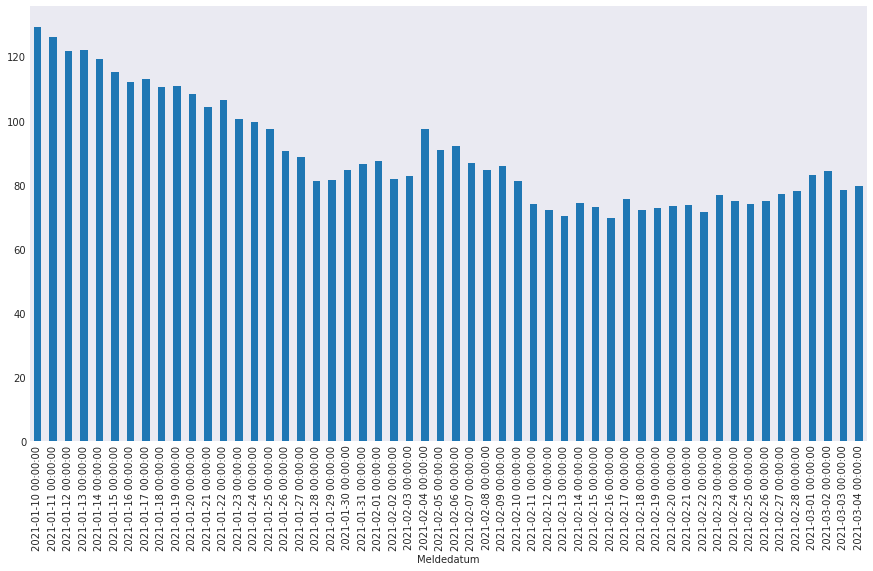

In [23]:
rki_kln_incidence['01-10-2021':].plot.bar()

In [24]:
rki_kln_incidence.tail()

Meldedatum
2021-02-28    77.974435
2021-03-01    83.185841
2021-03-02    84.267453
2021-03-03    78.269420
2021-03-04    79.744346
Name: AnzahlFall, dtype: float64

In [25]:
rki_kln = process_raw_df(rki_raw_kln)

In [49]:
rki_under60 = process_raw_df(rki_raw_60)
rki_under60.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality
Meldedatum                                                       
2021-02-28      2778          1.0               68       0.035997
2021-03-01      3553          0.0               74       0.000000
2021-03-02      8687          1.0               92       0.011511
2021-03-03      8768          0.0               62       0.000000
2021-03-04      5975          0.0               35       0.000000

In [26]:
rki = process_raw_df(rki_raw)
# using estimates for recovery dates and death dates
shift_recovery = 14 # days
shift_death = 20 # days
rki['NewRecovered'] = rki.NewRecoveredRKI.shift(shift_recovery).fillna(0)
rki['NewDeath'] = rki.NewDeathRKI.shift(shift_death).fillna(0)
s = rki['NewRecoveredRKI'].copy()
s.values[:-shift_recovery] = 0.
rki['NewRecovered'] += s
s = rki['NewDeathRKI'].copy()
s.values[:-shift_death] = 0.
rki['NewDeath'] += s
rki.fillna(value=0., inplace=True)
rki.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality  \
Meldedatum                                                          
2021-02-28      3469         12.0               96       0.345921   
2021-03-01      4633         23.0               91       0.496439   
2021-03-02     10873         13.0              123       0.119562   
2021-03-03     10948          2.0               91       0.018268   
2021-03-04      7383          4.0               46       0.054179   

            NewRecovered  NewDeath  
Meldedatum                          
2021-02-28        2625.0     199.0  
2021-03-01        2918.0     237.0  
2021-03-02        6483.0     248.0  
2021-03-03        6940.0     228.0  
2021-03-04        6282.0     167.0

In [27]:
rki80 = process_raw_df(rki_raw_80) # only age 80+
rki80.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality
Meldedatum                                                       
2021-02-28       205          9.0                8       4.390244
2021-03-01       376         18.0                4       4.787234
2021-03-02       577          5.0                8       0.866551
2021-03-03       569          2.0               11       0.351494
2021-03-04       390          3.0                3       0.769231

Text(0.5, 1.0, 'Case Fatality Germany for cases aged 80 or above (%)')

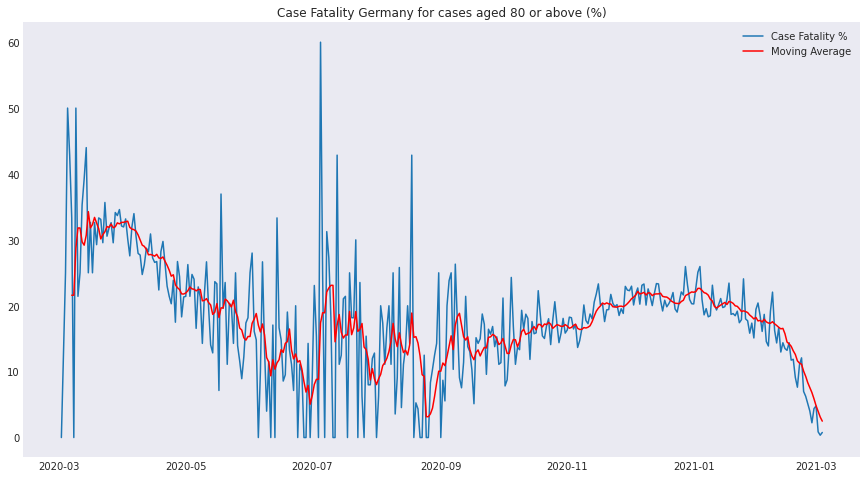

In [68]:
#rki60er['Case Fatality']['10-01-2020':].plot.bar()
start_date = '03-01-2020'
x = rki80[start_date:].index
plt.plot(x, rki80['Case Fatality'][start_date:], label='Case Fatality %')
plt.plot(x, rki80['Case Fatality'].rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality Germany for cases aged 80 or above (%)')

Text(0.5, 1.0, 'Fatalities by date of PCR positive test for ages 80+ Germany')

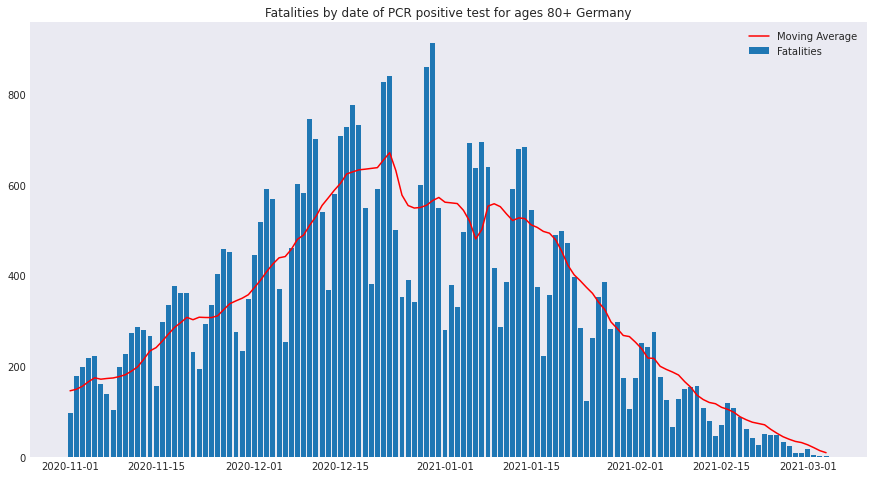

In [29]:
start_date = '11-01-2020'
x = rki80[start_date:].index
plt.bar(x, rki80.NewDeathRKI[start_date:], label='Fatalities')
plt.plot(x, rki80.NewDeathRKI.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Fatalities by date of PCR positive test for ages 80+ Germany')

In [30]:
rki['Cases'] = rki['NewCases'].cumsum()
rki['Death'] = rki['NewDeath'].cumsum()
rki['Recovered'] = rki['NewRecovered'].cumsum()
rki['ActiveCases'] = rki['Cases'] - rki['Recovered'] - rki['Death']
rki['Growth'] = rki['NewCases'] / rki['ActiveCases']
rki.tail(10)

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality  \
Meldedatum                                                          
2021-02-23     10199         66.0             1891       0.647122   
2021-02-24     11310         65.0             1581       0.574713   
2021-02-25      9942         53.0              891       0.533092   
2021-02-26      9441         36.0              496       0.381316   
2021-02-27      7679         14.0              283       0.182315   
2021-02-28      3469         12.0               96       0.345921   
2021-03-01      4633         23.0               91       0.496439   
2021-03-02     10873         13.0              123       0.119562   
2021-03-03     10948          2.0               91       0.018268   
2021-03-04      7383          4.0               46       0.054179   

            NewRecovered  NewDeath    Cases    Death  Recovered  ActiveCases  \
Meldedatum                                                                     
2021-02-23        8490.0     415.0  2406844  69366.0  2239734.0      97744.0   
2021-02-24        8927.0     441.0  2418154  69807.0  2248661.0      99686.0   
2021-02-25        7522.0     301.0  2428096  70108.0  2256183.0     101805.0   
2021-02-26        6460.0     224.0  2437537  70332.0  2262643.0     104562.0   
2021-02-27        4168.0      93.0  2445216  70425.0  2266811.0     107980.0   
2021-02-28        2625.0     199.0  2448685  70624.0  2269436.0     108625.0   
2021-03-01        2918.0     237.0  2453318  70861.0  2272354.0     110103.0   
2021-03-02        6483.0     248.0  2464191  71109.0  2278837.0     114245.0   
2021-03-03        6940.0     228.0  2475139  71337.0  2285777.0     118025.0   
2021-03-04        6282.0     167.0  2482522  71504.0  2292059.0     118959.0   

              Growth  
Meldedatum            
2021-02-23  0.104344  
2021-02-24  0.113456  
2021-02-25  0.097657  
2021-02-26  0.090291  
2021-02-27  0.071115  
2021-02-28  0.031936  
2021-03-01  0.042079  
2021-03-02  0.095173  
2021-03-03  0.092760  
2021-03-04  0.062063

Text(0.5, 1.0, 'Neue Fälle RKI nach Meldedatum')

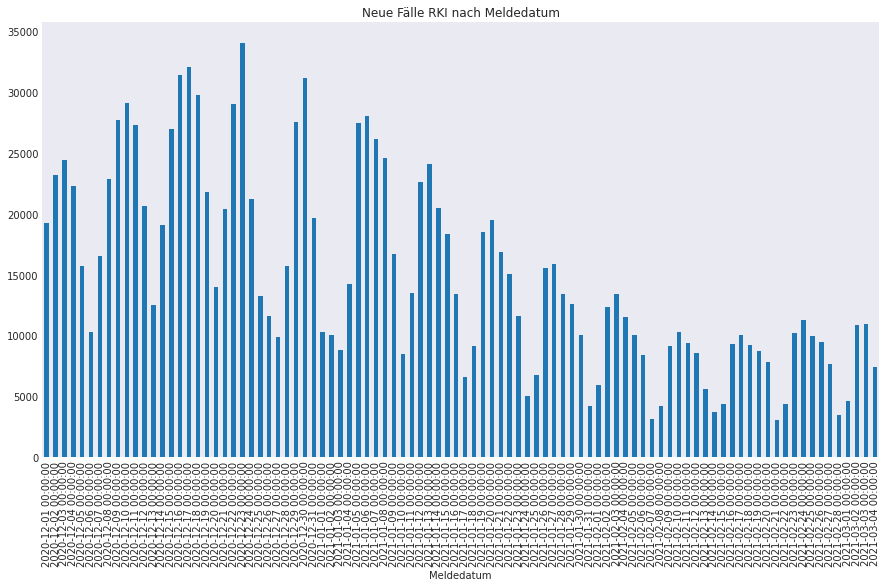

In [31]:
rki.NewCases['12-01-2020':].plot.bar()
plt.title("Neue Fälle RKI nach Meldedatum")

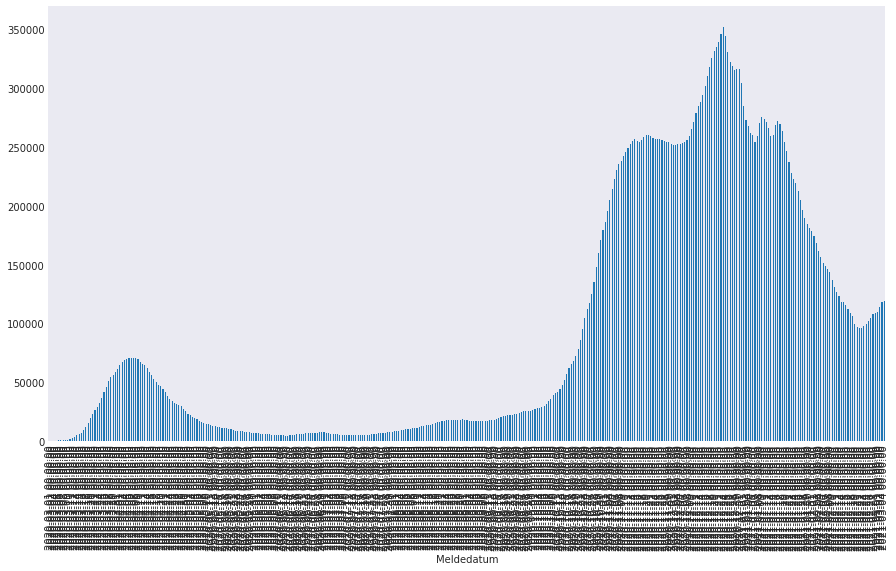

In [32]:
rki.ActiveCases['03-01-2020':].plot.bar()

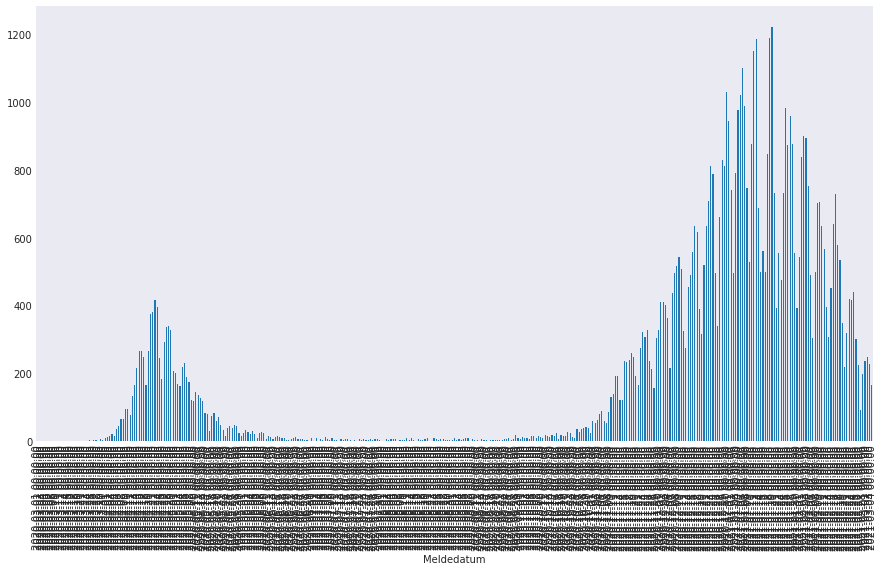

In [34]:
rki.NewDeath['03-01-2020':].plot.bar()

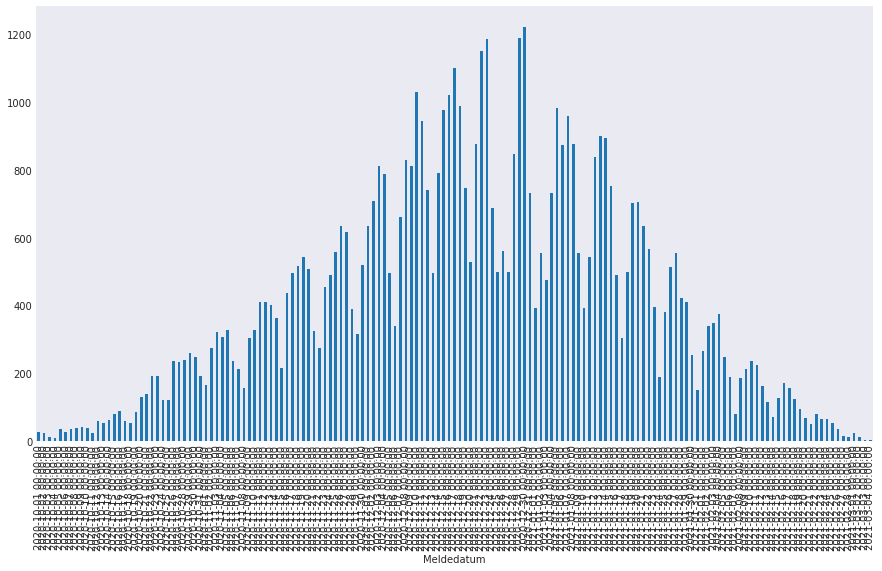

In [35]:
rki.NewDeathRKI['10-01-2020':].plot.bar()

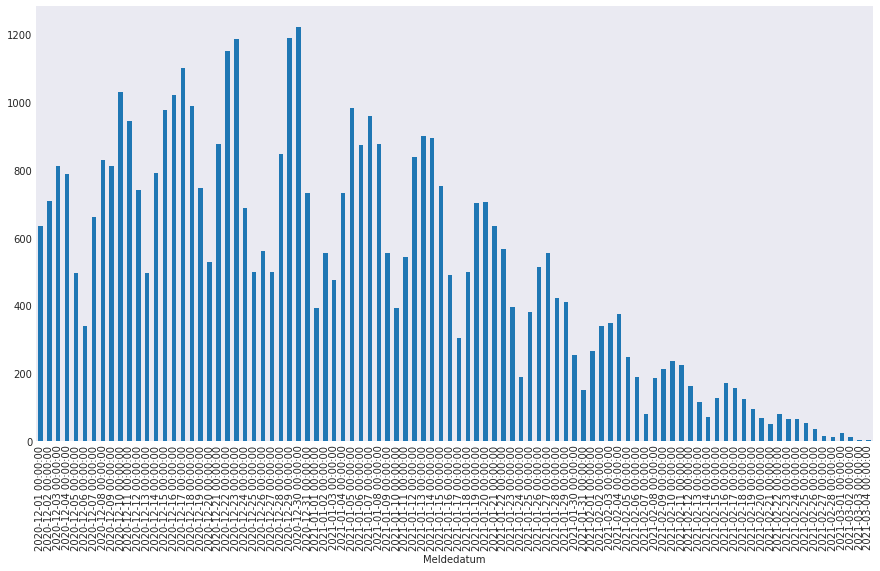

In [36]:
rki.NewDeathRKI['12-01-2020':].plot.bar()

Text(0.5, 1.0, 'Growth Germany')

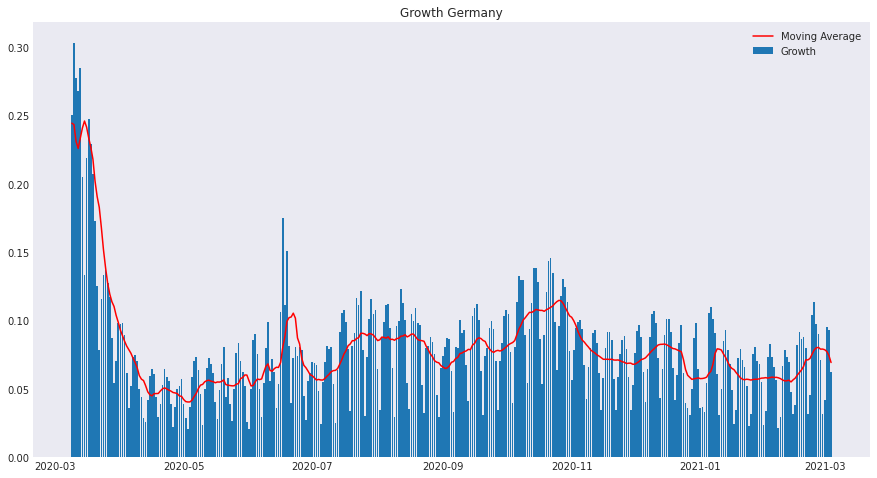

In [63]:
start_date = '03-09-2020'
x = rki[start_date:].index
plt.bar(x, rki.Growth[start_date:], label='Growth')
plt.plot(x, rki.Growth.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Growth Germany')

Text(0.5, 1.0, 'Growth Germany')

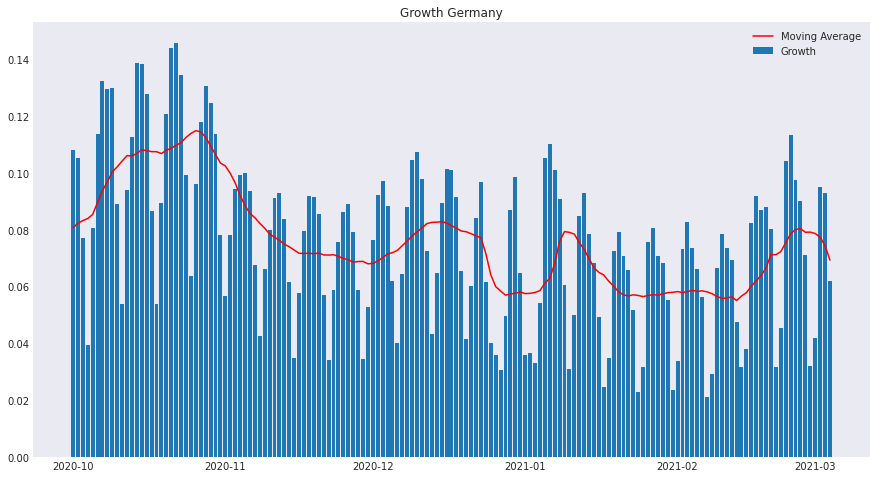

In [64]:
start_date = '10-01-2020'
x = rki[start_date:].index
plt.bar(x, rki.Growth[start_date:], label='Growth')
plt.plot(x, rki.Growth.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Growth Germany')

In [39]:
rki.tail(20)

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality  \
Meldedatum                                                          
2021-02-13      5628        116.0             3885       2.061123   
2021-02-14      3752         70.0             2529       1.865672   
2021-02-15      4399        127.0             2827       2.887020   
2021-02-16      9262        172.0             6360       1.857050   
2021-02-17     10001        156.0             6849       1.559844   
2021-02-18      9256        124.0             6236       1.339672   
2021-02-19      8737         95.0             5812       1.087330   
2021-02-20      7797         67.0             3155       0.859305   
2021-02-21      3054         51.0             1164       1.669941   
2021-02-22      4378         79.0             1142       1.804477   
2021-02-23     10199         66.0             1891       0.647122   
2021-02-24     11310         65.0             1581       0.574713   
2021-02-25      9942         53.0              891       0.533092   
2021-02-26      9441         36.0              496       0.381316   
2021-02-27      7679         14.0              283       0.182315   
2021-02-28      3469         12.0               96       0.345921   
2021-03-01      4633         23.0               91       0.496439   
2021-03-02     10873         13.0              123       0.119562   
2021-03-03     10948          2.0               91       0.018268   
2021-03-04      7383          4.0               46       0.054179   

            NewRecovered  NewDeath    Cases    Death  Recovered  ActiveCases  \
Meldedatum                                                                     
2021-02-13        9747.0     306.0  2336009  64715.0  2152689.0     118605.0   
2021-02-14        4057.0     451.0  2339761  65166.0  2156746.0     117849.0   
2021-02-15        5607.0     641.0  2344160  65807.0  2162353.0     116000.0   
2021-02-16       11975.0     728.0  2353422  66535.0  2174328.0     112559.0   
2021-02-17       13047.0     577.0  2363423  67112.0  2187375.0     108936.0   
2021-02-18       11129.0     535.0  2372679  67647.0  2198504.0     106528.0   
2021-02-19       15552.0     348.0  2381416  67995.0  2214056.0      99365.0   
2021-02-20        9724.0     219.0  2389213  68214.0  2223780.0      97219.0   
2021-02-21        3480.0     318.0  2392267  68532.0  2227260.0      96475.0   
2021-02-22        3984.0     419.0  2396645  68951.0  2231244.0      96450.0   
2021-02-23        8490.0     415.0  2406844  69366.0  2239734.0      97744.0   
2021-02-24        8927.0     441.0  2418154  69807.0  2248661.0      99686.0   
2021-02-25        7522.0     301.0  2428096  70108.0  2256183.0     101805.0   
2021-02-26        6460.0     224.0  2437537  70332.0  2262643.0     104562.0   
2021-02-27        4168.0      93.0  2445216  70425.0  2266811.0     107980.0   
2021-02-28        2625.0     199.0  2448685  70624.0  2269436.0     108625.0   
2021-03-01        2918.0     237.0  2453318  70861.0  2272354.0     110103.0   
2021-03-02        6483.0     248.0  2464191  71109.0  2278837.0     114245.0   
2021-03-03        6940.0     228.0  2475139  71337.0  2285777.0     118025.0   
2021-03-04        6282.0     167.0  2482522  71504.0  2292059.0     118959.0   

              Growth  
Meldedatum            
2021-02-13  0.047452  
2021-02-14  0.031837  
2021-02-15  0.037922  
2021-02-16  0.082286  
2021-02-17  0.091806  
2021-02-18  0.086888  
2021-02-19  0.087928  
2021-02-20  0.080200  
2021-02-21  0.031656  
2021-02-22  0.045391  
2021-02-23  0.104344  
2021-02-24  0.113456  
2021-02-25  0.097657  
2021-02-26  0.090291  
2021-02-27  0.071115  
2021-02-28  0.031936  
2021-03-01  0.042079  
2021-03-02  0.095173  
2021-03-03  0.092760  
2021-03-04  0.062063

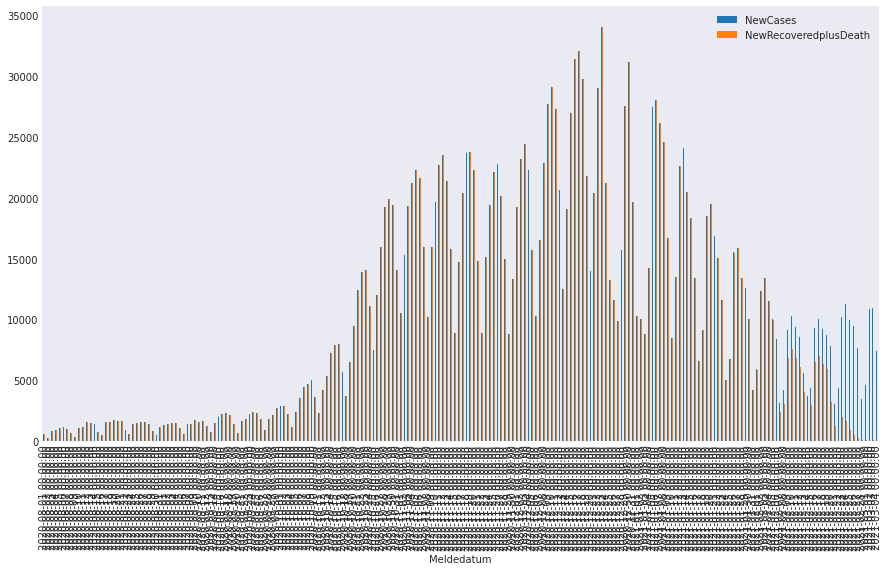

In [40]:
rki['NewRecoveredplusDeath'] = rki.NewRecoveredRKI + rki.NewDeathRKI
rki['08-01-2020':][['NewCases', 'NewRecoveredplusDeath']].plot.bar()
rki.drop('NewRecoveredplusDeath', axis=1, inplace=True)

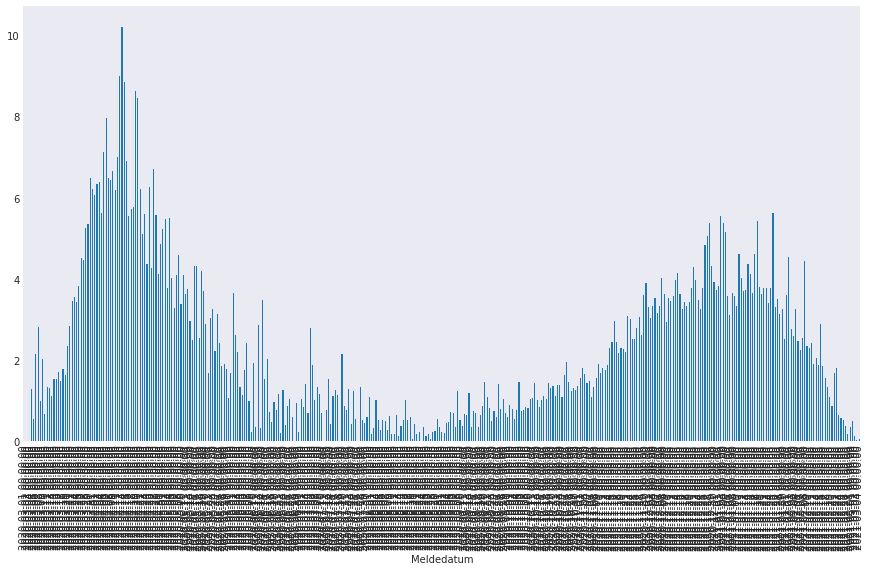

In [41]:
rki['Case Fatality']['03-01-2020':].plot.bar()

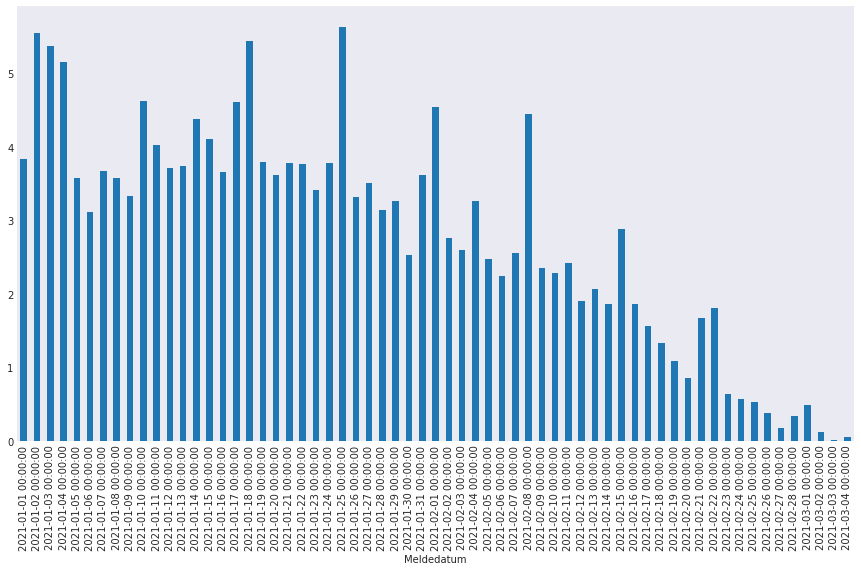

In [42]:
rki['Case Fatality']['01-01-2021':].plot.bar()

Text(0.5, 1.0, 'Case Fatality Germany (%)')

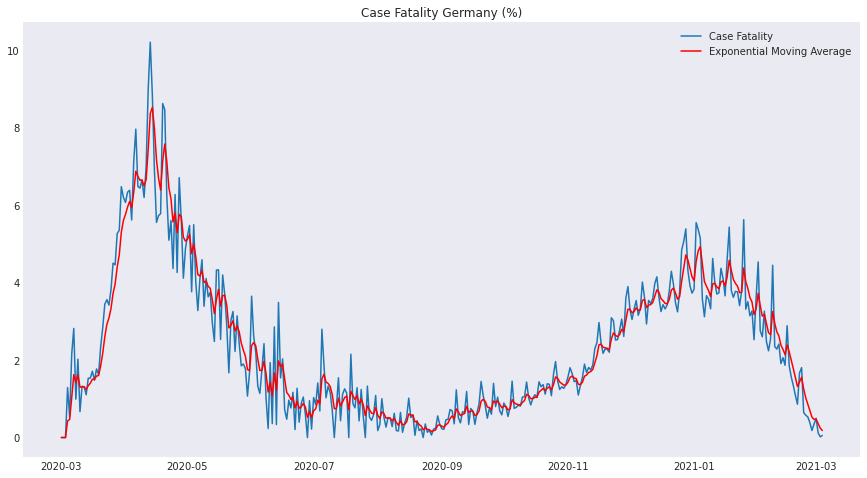

In [48]:
start_date = '03-01-2020'
x = rki[start_date:].index
plt.plot(x, rki['Case Fatality'][start_date:], label='Case Fatality')
plt.plot(x, rki['Case Fatality'].ewm(span=5,adjust=False).mean()[start_date:], label='Exponential Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality Germany (%)')

Text(0.5, 1.0, 'Daily Covid Fatalities (PCR positive) under 60 years Germany')

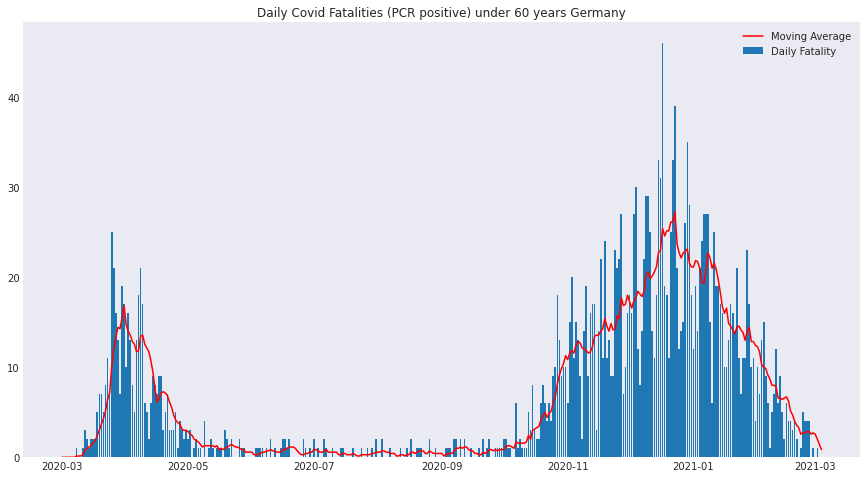

In [60]:
start_date = '03-01-2020'
x = rki_under60[start_date:].index
plt.bar(x, rki_under60.NewDeathRKI[start_date:], label='Daily Fatality')
plt.plot(x, rki_under60.NewDeathRKI.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Daily Covid Fatalities (PCR positive) under 60 years Germany')

Text(0.5, 1.0, 'Case Fatality (PCR positive) under 60 years Germany in %')

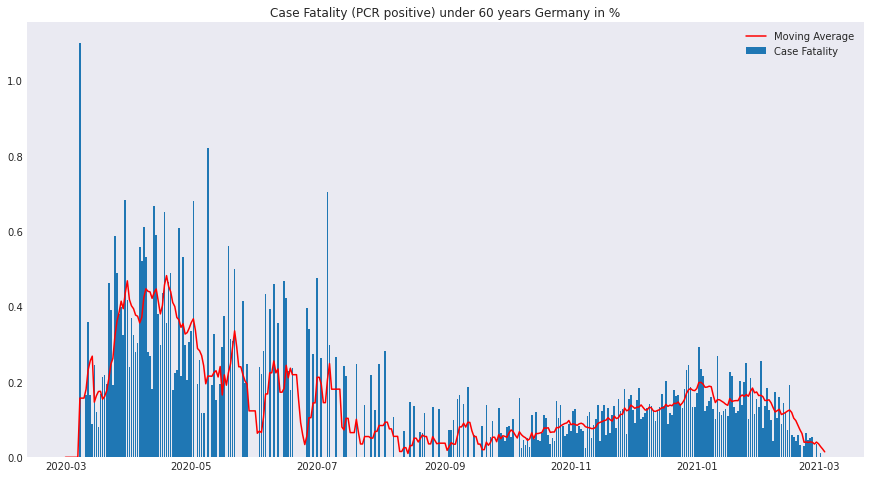

In [61]:
start_date = '03-01-2020'
x = rki_under60[start_date:].index
plt.bar(x, rki_under60['Case Fatality'][start_date:], label='Case Fatality')
plt.plot(x, rki_under60['Case Fatality'].rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality (PCR positive) under 60 years Germany in %')